In [1]:
import pandas as pd

In [17]:
header = ['l1', 'l2', 'l3', 'l4', 'l5', 'r1', 'r2', 'r3', 'r4', 'r5', 'l_ax', 'l_ay', 'l_az', 'l_gx', 'l_gy', 'l_gz']

In [ ]:
rf_model

In [178]:
df_final['label'].value_counts()

label
hello        119
sorry        119
goodbye      119
thank you    119
welcome      118
Name: count, dtype: int64

In [176]:
df_final

,l1,l2,l3,l4,l5,r1,r2,r3,r4,r5,l_ax,l_ay,l_az,l_gx,l_gy,l_gz,label
0,3008,2923,1661,2841,0,0,0,0,0,0,8.377312,-3.088520,6.890512,-0.085801,-0.017853,-0.046897,hello
1,3015,2882,1664,2837,0,0,0,0,0,0,8.566454,-3.023877,6.562507,-0.087400,-0.005596,-0.051960,hello
2,3024,2906,1654,2835,0,0,0,0,0,0,8.463503,-3.009511,6.694188,-0.102588,0.006662,-0.049562,hello
3,3027,2903,1651,2848,0,0,0,0,0,0,8.760384,-2.664747,6.344635,-0.100723,-0.009593,-0.056224,hello
4,3023,2901,1663,2834,0,0,0,0,0,0,8.604761,-2.844312,6.550536,-0.100723,0.001599,-0.031176,hello
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,2960,2827,1664,2800,0,0,0,0,0,0,9.021352,0.624887,6.976704,-0.082337,-0.026380,-0.057556,welcome
590,2965,2820,1665,2803,0,0,0,0,0,0,9.040505,0.641646,6.864176,-0.085268,-0.008260,-0.072478,hello
591,2963,2811,1664,2801,0,0,0,0,0,0,9.105149,0.608127,6.852205,-0.053026,0.009326,-0.036505,sorry
592,2961,2819,1663,2800,0,0,0,0,0,0,9.016563,0.488417,7.031770,-0.108717,0.011458,0.003198,goodbye


In [174]:
import pandas as pd
import numpy as np

# Assuming df is your existing DataFrame with a 'label' column
# df = pd.read_csv("your_data.csv")  # Load data if needed

# Define new labels
new_labels = ["hello", "sorry", "goodbye", "thank you", "welcome"]

# Number of rows
num_rows = len(df_final)

# Ensure equal distribution while handling remainder cases
label_repeats = np.repeat(new_labels, num_rows // len(new_labels))  # Repeat each label evenly
remaining_labels = new_labels[:(num_rows % len(new_labels))]  # Handle any leftover rows

# Combine them
final_labels = list(label_repeats) + remaining_labels  # Ensure total length matches df

# Assign new labels to DataFrame
df_final['label'] = final_labels

# Display first few rows to verify
print(df_final.head(10))

     l1    l2    l3    l4  l5  r1  r2  r3  r4  r5      l_ax      l_ay  \
0  3008  2923  1661  2841   0   0   0   0   0   0  8.377312 -3.088520   
1  3015  2882  1664  2837   0   0   0   0   0   0  8.566454 -3.023877   
2  3024  2906  1654  2835   0   0   0   0   0   0  8.463503 -3.009511   
3  3027  2903  1651  2848   0   0   0   0   0   0  8.760384 -2.664747   
4  3023  2901  1663  2834   0   0   0   0   0   0  8.604761 -2.844312   
5  3023  2906  1658  2858   0   0   0   0   0   0  8.597578 -2.796427   
6  3017  2898  1662  2830   0   0   0   0   0   0  8.681376 -2.626439   
7  3017  2890  1662  2835   0   0   0   0   0   0  8.588001 -2.791639   
8  3007  2891  1652  2836   0   0   0   0   0   0  8.662222 -2.762909   
9  3006  2894  1666  2837   0   0   0   0   0   0  8.678981 -2.798822   

       l_az      l_gx      l_gy      l_gz  label  
0  6.890512 -0.085801 -0.017853 -0.046897  hello  
1  6.562507 -0.087400 -0.005596 -0.051960  hello  
2  6.694188 -0.102588  0.006662 -0.049562  

In [81]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [83]:
# Assume 'label' is the target column
y = df_final['label']  # Replace 'label' with your actual target column name
X = df_final.drop(columns=['label'])  # Drop target column to keep only features

# Convert categorical columns to numerical (if any)
X = pd.get_dummies(X)

# Handle missing values (if present)
X = X.fillna(X.mean())  # Fill missing values with mean (adjust as needed)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
y_pred = rf_model.predict(X_test)


In [95]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9748
              precision    recall  f1-score   support

           a       1.00      1.00      1.00         5
           b       1.00      1.00      1.00         3
           c       0.67      1.00      0.80         2
          ch       1.00      1.00      1.00         9
           d       1.00      1.00      1.00         6
           e       1.00      1.00      1.00         3
           f       1.00      1.00      1.00         4
           g       1.00      1.00      1.00         3
           h       1.00      1.00      1.00         9
           i       1.00      0.80      0.89         5
    i love u       1.00      0.80      0.89         5
           k       1.00      1.00      1.00         3
           l       0.80      1.00      0.89         4
           m       1.00      1.00      1.00         5
           n       0.83      1.00      0.91         5
           o       1.00      1.00      1.00         2
           p       1.00      1.00      1.00         7
          

In [160]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9748


In [101]:
rf_model.feature_importances_

array([0.11841094, 0.13527393, 0.11309313, 0.13263142, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15212632, 0.1550831 , 0.12961671, 0.02354936, 0.01560881,
       0.02460628])

In [103]:
rf_model.feature_names_in_

array(['l1', 'l2', 'l3', 'l4', 'l5', 'r1', 'r2', 'r3', 'r4', 'r5', 'l_ax',
       'l_ay', 'l_az', 'l_gx', 'l_gy', 'l_gz'], dtype=object)

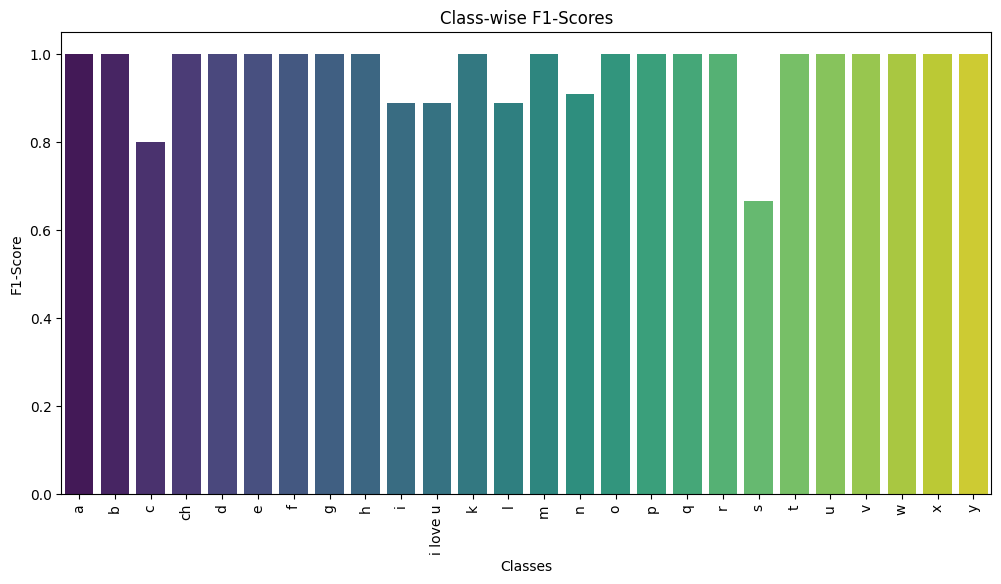

In [137]:
# Extract F1-scores
f1_scores = report_df["f1-score"]

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=f1_scores.index, y=f1_scores.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.xlabel("Classes")
plt.ylabel("F1-Score")
plt.title("Class-wise F1-Scores")
plt.show()

<Axes: >

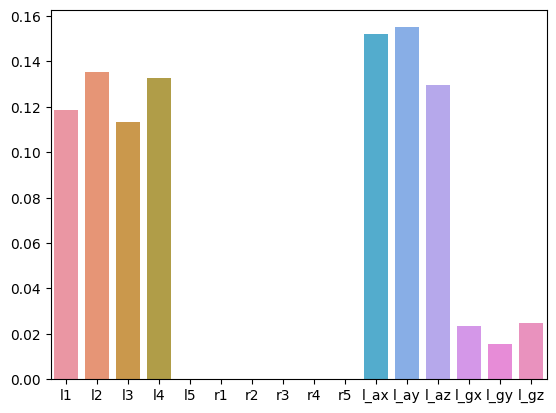

In [107]:
sns.barplot(x=rf_model.feature_names_in_, y=rf_model.feature_importances_)

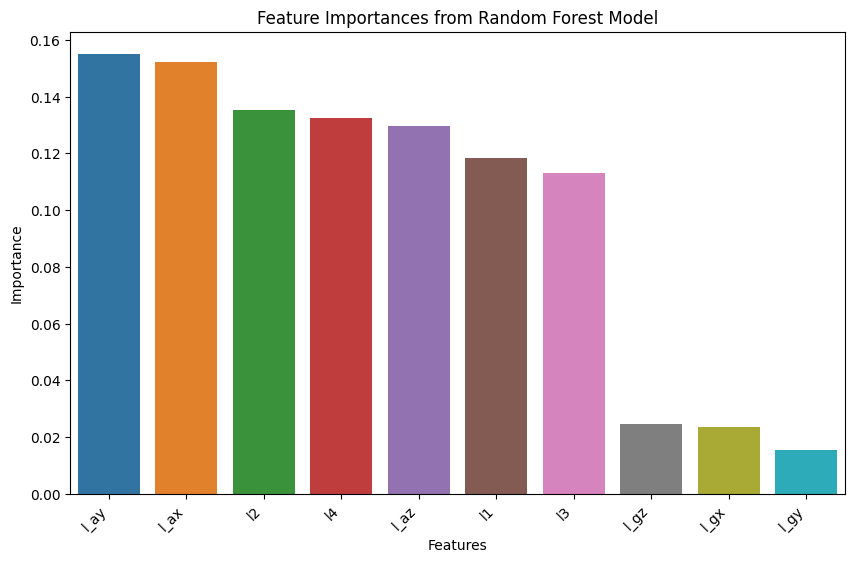

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': rf_model.feature_names_in_,
    'Importance': rf_model.feature_importances_
})

# Filter out features with zero importance and sort in descending order
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0]
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the barplot
plt.figure(figsize=(10, 6))+
sns.barplot(x=feature_importance_df['Feature'], y=feature_importance_df['Importance'])

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances from Random Forest Model")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [93]:
import pickle

# Save the trained model
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved successfully!")

Model saved successfully!


In [117]:
import pickle

# Open the file in read-binary ('rb') mode
with open("random_forest_model.pkl", "rb") as file:
    m1 = pickle.load(file)

# Now `m1` contains the loaded Random Forest model
print(m1)  # Optional: Print model details to verify

RandomForestClassifier(random_state=42)


In [125]:
sample = np.array([[,,]])
sample.shape

(1, 2)

In [ ]:
m1.predict(np.array([]))

In [162]:
df_final.to_csv("v1_final.csv", index=False)

In [139]:
# Example WebSocket received message
received_data = '{"temperature":25.3,"humidity":60.0}'

# Parse JSON
parsed_data = json.loads(received_data)
print(parsed_data)

# Convert to NumPy array (if model expects structured numerical input)
input_features = np.array([[parsed_data["temperature"], parsed_data["humidity"]]])
input_features

{'temperature': 25.3, 'humidity': 60.0}


array([[25.3, 60. ]])

In [ ]:
!pip install tensorflow

In [147]:
import tensorflow as tf

In [153]:
import math
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

def get_model():
    SAMPLES = 1000
    np.random.seed(1337)
    x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
    # shuffle and add noise
    np.random.shuffle(x_values)
    y_values = np.sin(x_values)
    y_values += 0.1 * np.random.randn(*y_values.shape)

    # split into train, validation, test
    TRAIN_SPLIT =  int(0.6 * SAMPLES)
    TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
    x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
    y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

    # create a NN with 2 layers of 16 neurons
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(x_train, y_train, epochs=10, batch_size=16,
                        validation_data=(x_validate, y_validate))
    return model

In [155]:
model = get_model()
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

C:\Users\Danish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4681 - mae: 0.5772 - val_loss: 0.3941 - val_mae: 0.5364
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3298 - mae: 0.4974 - val_loss: 0.3173 - val_mae: 0.4910
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2631 - mae: 0.4473 - val_loss: 0.3056 - val_mae: 0.4900
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2170 - mae: 0.4025 - val_loss: 0.2209 - val_mae: 0.4072
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1906 - mae: 0.3818 - val_loss: 0.1936 - val_mae: 0.3854
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1804 - mae: 0.3696 - val_loss: 0.1787 - val_mae: 0.3676
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1609 - mae: 0.3443 - val_loss: 0.1641 - val_mae: 0.3461
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1556 - mae: 0.3355 - val_loss: 0.1540 - val_mae: 0.3327
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1584 - 

INFO:tensorflow:Assets written to: C:\Users\Danish\AppData\Local\Temp\tmp2fjmxy7a\assets


INFO:tensorflow:Assets written to: C:\Users\Danish\AppData\Local\Temp\tmp2fjmxy7a\assets


Saved artifact at 'C:\Users\Danish\AppData\Local\Temp\tmp2fjmxy7a'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2179446439376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2179446439184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2179449505168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2179449506512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2179449506128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2179449507280: TensorSpec(shape=(), dtype=tf.resource, name=None)


3164

In [158]:
from tinymlgen import port

model = get_model()
c_code = port(model, pretty_print=True)
print(c_code)

C:\Users\Danish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.1692 - mae: 0.9152 - val_loss: 0.6322 - val_mae: 0.7309
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4783 - mae: 0.6129 - val_loss: 0.4902 - val_mae: 0.6093
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4013 - mae: 0.5463 - val_loss: 0.4321 - val_mae: 0.5765
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3238 - mae: 0.4879 - val_loss: 0.3690 - val_mae: 0.5326
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3064 - mae: 0.4796 - val_loss: 0.2800 - val_mae: 0.4602
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2320 - mae: 0.4254 - val_loss: 0.2376 - val_mae: 0.4257
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1962 - mae: 0.3865 - val_loss: 0.2020 - val_mae: 0.3911
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1822 - mae: 0.3749 - val_loss: 0.1900 - val_mae: 0.3874
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1683 -

INFO:tensorflow:Assets written to: C:\Users\Danish\AppData\Local\Temp\tmp5qukvhg3\assets


INFO:tensorflow:Assets written to: C:\Users\Danish\AppData\Local\Temp\tmp5qukvhg3\assets


Saved artifact at 'C:\Users\Danish\AppData\Local\Temp\tmp5qukvhg3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2179449508048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2179449509008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2179449517840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2179449519760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2179449519952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2179449512464: TensorSpec(shape=(), dtype=tf.resource, name=None)



#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char model_data[] DATA_ALIGN_ATTRIBUTE = {
	0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 
	0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 
	0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 
	0x98, 0x00, 0x00, 0x00, 0xf0, 0x00, 0x00, 0x00, 0x14, 0x07, 0x00, 0x00, 
	0x24, 0x07, 0x00, 0x00, 0x08, 0x0c, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 
	0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00, 
	0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00, 
	0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 
	0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67,